# Lab: Logistic Regression (lab 8) & K-Means Clustering (lab 9)

## Objectives
In this lab, you will:
1. Apply **Logistic Regression** to classify data and evaluate the model using various metrics.
2. Implement **K-Means Clustering** and assess cluster quality using evaluation metrics.

---


# Logistic Regression

## Introduction
Logistic Regression is a statistical method for binary classification that predicts the probability that a given input belongs to a particular class. Despite its name, it is a classification algorithm rather than a regression algorithm.

## Mathematical Foundation
Logistic Regression models the relationship between the independent variables \(X\) and the dependent variable \(Y\) using the **logistic function** (also called the **sigmoid function**):

$$
sigmoid(z) = \frac{1}{1 + e^{-z}}
$$

where \(z\) is a linear combination of input features:

$$
z = w_0 + w_1 x_1 + w_2 x_2 + ... + w_n x_n
$$

Here:
- \\(w_0\\) is the bias (intercept),
- \\(w_1, w_2, ..., w_n\\) are the model coefficients (weights),
- \\(x_1, x_2, ..., x_n\\) are the input features.

The output of the sigmoid function is a probability \(p\) that the given input belongs to class 1:

$$
p = \frac{1}{1 + e^{-(w_0 + w_1 x_1 + ... + w_n x_n)}}
$$

If \\(p \geq 0.5\\), we classify the input as class 1; otherwise, it belongs to class 0.

## Cost Function
Logistic Regression uses the **log loss (binary cross-entropy loss)** as the cost function:

$$
J(w) = - \frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log(\hat{y_i}) + (1 - y_i) \log(1 - \hat{y_i}) \right]
$$

where:
- \\(m\\) is the number of training examples,
- \\(y_i\\) is the actual label (0 or 1),
- \\(\hat{y_i}\\) is the predicted probability for class 1.

The cost function is minimized using **Gradient Descent**, where the weights are updated iteratively:

$$
w_j := w_j - \alpha \frac{\partial J(w)}{\partial w_j}
$$

where \\(\alpha\\) is the learning rate.

## Decision Boundary
The decision boundary is the threshold where the model predicts class 0 or class 1. In a 2D case, it is a linear line given by:

$$
w_0 + w_1 x_1 + w_2 x_2 = 0
$$

This means Logistic Regression is a **linear classifier** in its basic form.

## Model Evaluation Metrics
Logistic Regression can be evaluated using various metrics:
- **Accuracy**: Fraction of correct predictions
- **Precision**: \\( \frac{TP}{TP + FP} \\)
- **Recall (Sensitivity)**: \\( \frac{TP}{TP + FN} \\)
- **F1 Score**: Harmonic mean of precision and recall
- **ROC Curve & AUC Score**: Measures model performance across different thresholds

## Summary
- Logistic Regression is used for **binary classification** problems.
- It applies the **sigmoid function** to map input values to probabilities.
- The model is optimized using **Gradient Descent**.
- It is a **linear classifier**, but can be extended to handle non-linearity using feature engineering.

Logistic Regression is widely used in machine learning for problems like spam detection, medical diagnosis, and customer churn prediction.

## Logistic Regression Implementation

### Steps:
1. Load and explore the dataset.
2. Preprocess the data (handle missing values, encode categorical variables, and scale features if necessary).
3. Split the data into training and testing sets.
4. Train a logistic regression model.
5. Evaluate the model using:
   - Accuracy
   - Precision
   - Recall
   - ROC Curve
6. Visualize the results.

---


In [26]:
# pip install -U scikit-learn

# Logistic Regression: Predicting Student Pass/Fail Based on Study Hours

Unlike Linear Regression, which predicts continuous values, Logistic Regression **predicts probabilities** and maps them into two categories using the **Sigmoid function**.


### **Step 1: Import Required Libraries**

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc, confusion_matrix

### **Step 2: Create a Simple Dataset**

In [68]:
# We will create a dataset where:
# Feature (X) = Study Hours
# Target (y) = 1 if the student passes, 0 if they fail

data = {
    "Study_Hours": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Pass": [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]  # 1 = Pass, 0 = Fail
}

df = pd.DataFrame(data)
print(df)


   Study_Hours  Pass
0            1     0
1            2     0
2            3     0
3            4     1
4            5     1
5            6     1
6            7     1
7            8     1
8            9     1
9           10     1


### **Step 3: Split Data into Training and Testing Sets**

In [69]:
# Split features (X) and target variable (y)
X = df[['Study_Hours']]
y = df['Pass']

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_test, end="\n----------\n")
print(y_test)

   Study_Hours
8            9
1            2
----------
8    1
1    0
Name: Pass, dtype: int64


### **Step 4: Train the Logistic Regression Model**

In [70]:
# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### **Step 5: Make Predictions**

In [71]:
# Predict on test data
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Get probability of passing

### **Step 6: Evaluate the Model**

#### Accuracy

In [72]:
# Accuracy: Measures overall correctness of the model.
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


#### Precision & Recall

In [73]:
# Precision = How many predicted "Pass" values were correct?
# Recall = How many actual "Pass" values were correctly predicted?
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precision: 1.00
Recall: 1.00


#### Confusion Matrix

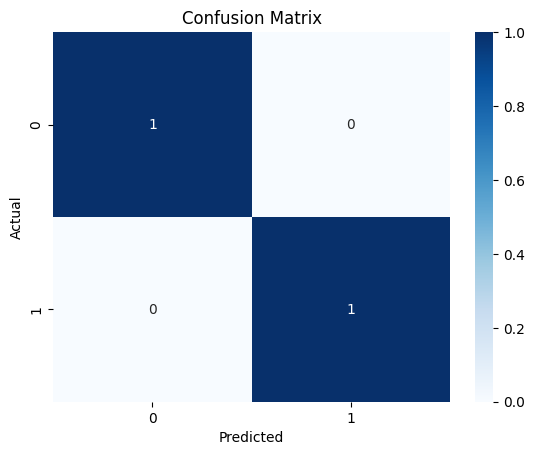

In [74]:
# True Positives (TP): Predicted Pass & Actually Passed
# True Negatives (TN): Predicted Fail & Actually Failed
# False Positives (FP): Predicted Pass but Actually Failed (Type I Error)
# False Negatives (FN): Predicted Fail but Actually Passed (Type II Error)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### ROC Curve & AUC Score

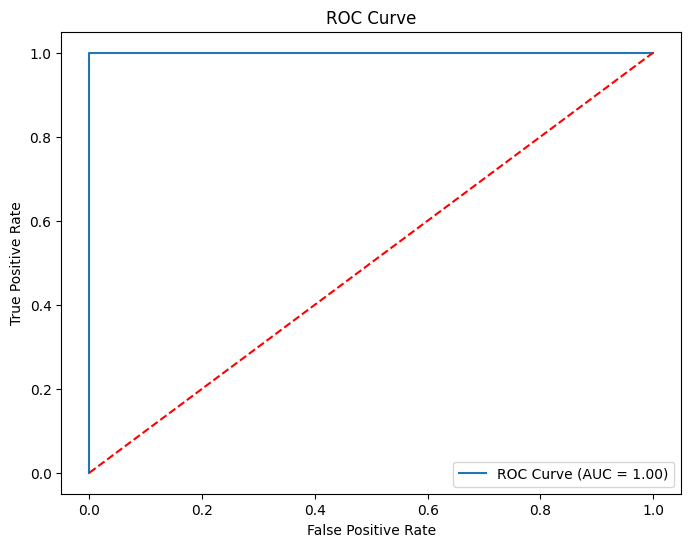

In [76]:
# ROC Curve shows the tradeoff between False Positives and True Positives.
# AUC Score measures how well the model separates Pass/Fail.
# AUC = 1.0 → Perfect Model
# AUC = 0.5 → Random Guessing

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# ROC (Receiver Operating Characteristic) Curve and AUC (Area Under the Curve)

## ROC Curve

The **ROC curve** is a graphical representation that shows the performance of a classification model at various classification thresholds. It plots the relationship between two key metrics:

- **True Positive Rate (TPR)**, also known as **Recall** or **Sensitivity**:
  

$$
  TPR = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

  This is the proportion of actual positives that are correctly identified by the model.

- **False Positive Rate (FPR)**:

$$
  FPR = \frac{\text{FP}}{\text{FP} + \text{TN}}
$$

  This is the proportion of actual negatives that are incorrectly identified as positive by the model (i.e., the proportion of false positives).

### Key Points:

- **X-axis**: False Positive Rate (FPR) – The rate at which negative samples are incorrectly classified as positive.
- **Y-axis**: True Positive Rate (TPR) – The rate at which positive samples are correctly classified as positive.

In a **good model**, you want a high TPR (close to 1) and a low FPR (close to 0). The **ideal point** on the ROC curve is in the top left corner, where the TPR is 1 and the FPR is 0.

---

## AUC (Area Under the Curve)

**AUC** stands for **Area Under the Curve** and represents the area under the ROC curve. The **AUC score** gives a single value that summarizes the overall performance of the model.

- **AUC = 1**: A perfect model, which makes no mistakes.
- **AUC = 0.5**: A model with no discrimination ability (i.e., random guessing).
- **AUC < 0.5**: A model that performs worse than random guessing (this would indicate that the model is predicting the opposite class).

### Interpretation of AUC:
- **AUC of 0.9 to 1.0**: Excellent model performance. The model is very good at distinguishing between the positive and negative classes.
- **AUC of 0.7 to 0.9**: Good model performance. The model has decent ability to differentiate between classes.
- **AUC of 0.5 to 0.7**: Model is performing poorly. It may be close to random guessing.
- **AUC less than 0.5**: The model is worse than random guessing and is performing incorrectly.

---

## Why ROC and AUC are Useful

- The **ROC curve** helps visualize the trade-off between the **True Positive Rate** and **False Positive Rate** at different thresholds. It gives an insight into how well the model discriminates between the classes.
- The **AUC** provides an overall measure of the model’s ability to distinguish between the classes. A higher AUC generally indicates a better model.

## Logistic Regression on Breast Cancer dataset

In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc

# Load dataset (Example: Breast Cancer dataset from sklearn)
from sklearn.datasets import load_breast_cancer

# Load data
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [78]:
# Split into features and target
X = df.drop(columns=['target'])
y = df['target']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print(X_test, end="\n-------------\n")
# print(y_test)

In [79]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### StandardScaler

`StandardScaler` is a preprocessing technique in scikit-learn that standardizes features by removing the mean and scaling to unit variance. It ensures that each feature in the dataset has:

- **Mean** = 0  
- **Standard Deviation** = 1  

This helps improve the performance of machine learning algorithms, especially those that rely on distance measurements, such as:

- Logistic Regression  
- K-Means Clustering  
- Support Vector Machines (SVM)  
- Principal Component Analysis (PCA)  


In [80]:
# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [81]:
# Predictions
y_pred = model.predict(X_test)

In [82]:
# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.97
Precision: 0.97
Recall: 0.99


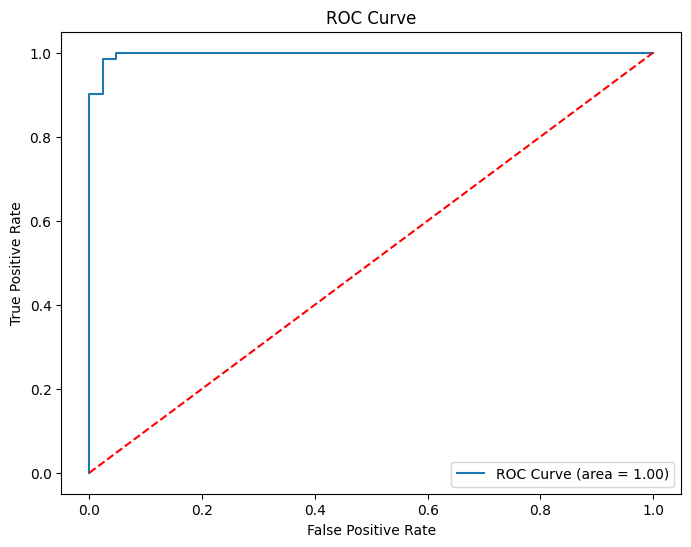

In [89]:
# ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})') # 0.99737962659679
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# K-Means Clustering

K-Means clustering is one of the most popular and widely used **unsupervised machine learning algorithms**. It is primarily used to partition a dataset into distinct groups (clusters) based on similarity. 

---

## Key Concepts

1. **Clustering:** 
   - Clustering is the process of grouping data points into clusters (or groups) based on their similarity. Points in the same cluster are more similar to each other than to those in other clusters.

2. **Unsupervised Learning:** 
   - K-Means is an **unsupervised learning** algorithm because it does not require labeled data. It learns patterns from the data itself.

3. **Centroids:** 
   - Each cluster is represented by a **centroid** (center point), which is typically the mean of the points in that cluster.

---

## How K-Means Clustering Works

K-Means clustering operates through an iterative process to find the optimal cluster centers (centroids) for a given number of clusters **K**. Here’s a step-by-step explanation of the algorithm:

#### **Step 1: Choose the number of clusters (K)**
- You need to predefine the number of clusters, **K**, before applying K-Means. K is an important hyperparameter that you must choose based on domain knowledge or through techniques like the **Elbow Method**.

#### **Step 2: Initialize centroids**
- Randomly select **K** data points from the dataset as the initial **centroids**. These centroids will represent the centers of the clusters.

#### **Step 3: Assign points to the nearest centroid**
- For each data point in the dataset, compute the distance to all the centroids (commonly using **Euclidean distance**). 
- Assign each data point to the **nearest centroid** (the centroid with the smallest distance).

#### **Step 4: Recompute the centroids**
- After assigning all data points to the nearest centroid, calculate the new centroid of each cluster by taking the mean of all data points assigned to that cluster.

#### **Step 5: Repeat the process**
- Reassign the data points to the new centroids based on the updated cluster centers.
- Recompute the centroids again using the updated clusters.
- Repeat the assignment and centroid update steps until the centroids no longer change significantly (i.e., convergence is reached), or a predefined number of iterations is completed.

#### **Step 6: Final clusters**
- Once the algorithm converges, you will have the final **K clusters**, and each data point will be assigned to one of those clusters.

---

## Mathematical Representation of K-Means

Let’s break down the core of the algorithm mathematically:

1. **Distance Calculation:**
   For each point \\(x_i\\) and centroid \\(c_k\\), the Euclidean distance is calculated as:

   $$
   d(x_i, c_k) = \sqrt{(x_{i1} - c_{k1})^2 + (x_{i2} - c_{k2})^2 + \dots + (x_{in} - c_{kn})^2}
   $$
   
   where:
   - \\(x_i = (x_{i1}, x_{i2}, \dots, x_{in})\\) is a data point with \\(n\\) features.
   - \\(c_k = (c_{k1}, c_{k2}, \dots, c_{kn})\\) is the centroid of the cluster \\(k\\).

2. **Centroid Update:**
   After assigning the points to the clusters, the centroid for each cluster \(k\) is updated as the mean of the points in that cluster:

   $$
   c_k = \frac{1}{|S_k|} \sum_{x_i \in S_k} x_i
   $$

   where:
   - \\(S_k\\) is the set of points assigned to cluster \\(k\\).
   - \\(|S_k|\\) is the number of points in cluster \\(k\\).

---

## Choosing the Number of Clusters (K)

Choosing the optimal value of **K** is crucial to the success of the K-Means algorithm. Here are a few methods to help determine **K**:

#### **1. Elbow Method**
   - The **Elbow Method** is one of the most commonly used techniques. It involves plotting the sum of squared errors (SSE) or within-cluster sum of squares (WCSS) for different values of **K**.
   - As **K** increases, the SSE decreases, but after a certain point, the rate of decrease slows down. The **elbow** point on the graph (where the rate of decrease slows down) is considered the optimal **K**.

#### **2. Silhouette Method**
   - The **Silhouette Score** measures how similar each point is to its own cluster compared to other clusters. It provides a way to assess the quality of clustering.
   - The silhouette score ranges from **-1 to 1**: 
     - A score close to **1** indicates that the points are well clustered.
     - A score close to **0** indicates overlapping clusters.
     - A negative score indicates incorrect clustering.

---

## Pros and Cons of K-Means

#### **Pros:**
- **Simple and Fast:** K-Means is easy to implement and computationally efficient, especially for large datasets.
- **Scalable:** It works well with large datasets, making it ideal for clustering large amounts of data.
- **Versatile:** Can be used for clustering, anomaly detection, and data summarization.

#### **Cons:**
- **Choosing K:** The algorithm requires you to specify the number of clusters **K** beforehand, which can be difficult to determine in practice.
- **Sensitive to Initialization:** The initial selection of centroids can affect the final result. Poor initialization can lead to suboptimal clusters.
- **Non-convex Shapes:** K-Means assumes clusters are spherical and equally sized, which may not work well for non-convex or unevenly sized clusters.
- **Outliers:** K-Means can be sensitive to outliers, as they can significantly affect the mean of the cluster and the centroid position.

---


## K-Means Clustering Implementation

### Steps:
1. Load and explore the dataset.
2. Normalize the data.
3. Apply the K-Means clustering algorithm.
4. Evaluate clustering using the **Silhouette Score**.
5. Visualize the clusters.

---


In [103]:
from sklearn.cluster import KMeans  # Import KMeans algorithm for clustering
from sklearn.metrics import silhouette_score  # Import silhouette_score for evaluating clustering quality

# Generate synthetic data
from sklearn.datasets import make_blobs  # Import make_blobs to generate synthetic data with blobs (clusters)

# Generate synthetic dataset with 300 samples and 4 centers (clusters)
# cluster_std specifies the spread of each cluster, and random_state ensures reproducibility
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)  

# Normalize features to scale them to have a mean of 0 and variance of 1
# This ensures each feature contributes equally to clustering
X = StandardScaler().fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)  # Initialize KMeans with 4 clusters, random_state for reproducibility, and n_init to run the algorithm 10 times with different initializations
labels = kmeans.fit_predict(X)  # Fit the model and predict the cluster labels for each data point

In [104]:
# Evaluate clustering using Silhouette Score
sil_score = silhouette_score(X, labels)  # Calculate the Silhouette Score using the features (X) and the cluster labels
print(f"Silhouette Score: {sil_score:.2f}")

Silhouette Score: 0.88


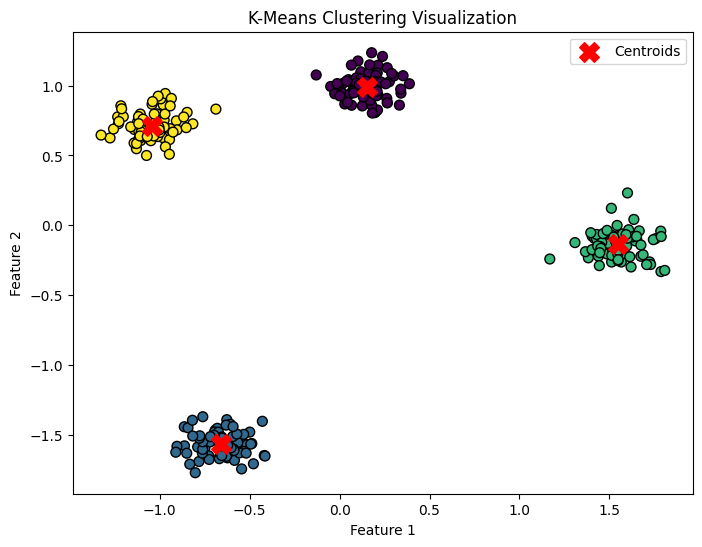

In [109]:
# Visualizing clusters
plt.figure(figsize=(8, 6))

# Plot the data points (X) with the following customizations:
# X[:, 0] refers to the first feature (x-axis), X[:, 1] refers to the second feature (y-axis)
# c=labels assigns each data point a color based on its cluster label
# cmap='viridis' specifies the color map for the clusters
# edgecolor='k' gives the points a black edge for better visibility
# s=50 sets the size of the data points
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)


# Plot the cluster centroids with the following customizations:
# kmeans.cluster_centers_ contains the coordinates of the cluster centroids
# s=200 increases the size of the centroid markers
# c='red' sets the color of the centroids to red
# marker='X' uses a red "X" shape to represent the centroids
# label='Centroids' labels the centroids for the legend
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering Visualization')
plt.legend()
plt.show()

# Practice Questions - Logistic Regression

## 1. Binary Classification on Iris Dataset
- Load the Iris dataset from `sklearn.datasets`.
- Select only two classes (e.g., Setosa and Versicolor).
- Train a Logistic Regression model and evaluate it using accuracy, precision, recall, and F1-score.

## 2. Predicting Diabetes
- Load the Pima Indians Diabetes dataset.
- Train a Logistic Regression model to predict whether a patient has diabetes.
- Evaluate the model using the ROC-AUC curve.

# **Iris Dataset Overview**
The **Iris dataset** is a well-known dataset in machine learning and statistics.

## **1. Dataset Description**
- The **Iris dataset** contains **150 samples** from **three species** of the iris flower:
  - **Setosa** (label: 0)
  - **Versicolor** (label: 1)
  - **Virginica** (label: 2)
- Each sample has **four features** (numerical values representing flower measurements):
  1. **Sepal length (cm)**
  2. **Sepal width (cm)**
  3. **Petal length (cm)**
  4. **Petal width (cm)**

## **2. Why is the Iris Dataset Popular?**
- It is small and easy to understand.
- It is often used for classification tasks.
- The data is well-structured and does not require heavy preprocessing.

## **3. How It Is Used in Machine Learning**
- **Supervised Learning**: Used for classification tasks like **Logistic Regression**, **Support Vector Machines (SVM)**, **Decision Trees**, etc.
- **Unsupervised Learning**: Used in **K-Means Clustering** to group similar flowers without labels.
- **Data Visualization**: Used for scatter plots, histograms, and pair plots to explore feature relationships.


In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

## 1. Binary Classification on Iris Dataset
from sklearn.datasets import load_iris

# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Select only two classes (Setosa and Versicolor)
X = X[y != 2]
y = y[y != 2]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on test data
y_pred = log_reg.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[12  0]
 [ 0  8]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [117]:
## 2. Predicting Diabetes (Pima Indians Dataset)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Load the Pima Indians Diabetes dataset from OpenML
diabetes = fetch_openml(name='diabetes', version=1, as_frame=True)
df = diabetes.frame  # Convert to Pandas DataFrame

# Display first few rows
print(df.head())

# Split into features and target variable
X = df.drop("class", axis=1)  # 'class' is the target column in OpenML version
y = df["class"]

# Convert target variable to numerical (0 and 1)
y = y.map({'tested_negative': 0, 'tested_positive': 1})  

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict probabilities and compute ROC AUC score
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"ROC AUC Score: {roc_auc:.2f}")


   preg  plas  pres  skin  insu  mass   pedi  age            class
0     6   148    72    35     0  33.6  0.627   50  tested_positive
1     1    85    66    29     0  26.6  0.351   31  tested_negative
2     8   183    64     0     0  23.3  0.672   32  tested_positive
3     1    89    66    23    94  28.1  0.167   21  tested_negative
4     0   137    40    35   168  43.1  2.288   33  tested_positive
ROC AUC Score: 0.81


# Practice Questions - K-Means Clustering

## 1. Cluster Visualization on Synthetic Data
- Use `make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)`.
- Apply K-Means clustering with `n_clusters=4`.
- Visualize the clusters with scatter plots.

## 2. Find the Optimal K using the Elbow Method
- Generate synthetic data using `make_blobs()`.
- Run K-Means for different values of K (e.g., 2 to 10).
- Plot the inertia (sum of squared distances) vs. K to determine the optimal number of clusters.

## 3. Evaluate Clustering with Silhouette Score
- Perform K-Means clustering on the Iris dataset.
- Calculate and interpret the Silhouette Score.

## 4. K-Means Clustering on Mall Customers Dataset
- Load the Mall Customers dataset (available on Kaggle).
- Perform K-Means clustering to segment customers based on Annual Income and Spending Score.
- Visualize the clusters.

## 5. Clustering on Titanic Dataset
- Load the Titanic dataset.
- Convert categorical data into numerical features.
- Apply K-Means clustering to group passengers.
- Analyze which clusters had more survivors.


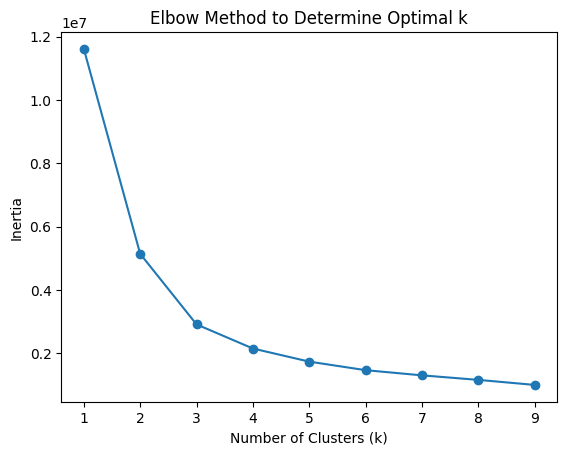

Silhouette Score (Iris): 0.46


In [118]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

## Find Optimal K using the Elbow Method
inertia_values = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal k')
plt.show()


## K-Means on Iris Dataset
X_iris = iris.data
y_iris = iris.target
X_scaled = StandardScaler().fit_transform(X_iris)
kmeans_iris = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_iris.fit(X_scaled)
print(f"Silhouette Score (Iris): {silhouette_score(X_scaled, kmeans_iris.labels_):.2f}")

# Model Saving and Loading

In [ ]:
import pickle
from sklearn.linear_model import LogisticRegression

# Create and train a model
model = LogisticRegression()
model.fit(X_train, y_train)  # Assume X_train, y_train are already defined

# Save the model to a file
with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Load the model from the file
with open('logistic_regression_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Make predictions using the loaded model
predictions = loaded_model.predict(X_test)  # Assume X_test is defined
